# Alternative Algos

In [6]:
from IPython.display import display, Markdown

with open("README.md", "r") as f:
    text = "".join(f.readlines())
    
display(Markdown(text))

This addresses the reviewers critique of LazyFOX only being compared to FOX, not to other approaches.

This contains runs of other algorithms (`oslom v2`, `bigClam`,`core-expansion`) on our three core datasets (`EU-core`, `DBLP`, `LiveJournal`).

`oslom` and `core-expansion` struggled to compute results for the `liveJournal` dataset due to its size.
We ran `oslom` with default arg (10 runs on hierarchy 0, 50 runs on higher hierarchies), which we aborted after `68 hours`, having not finished the third run of the first ten.
We then re-ran `oslom` changing the run count to just 1 for hierarchy 0, and skipping all higher hierarchy runs.

`core-expansion` already struggled computation on `DBLP`, which took `32 hours`, which is why we did not start computation on `LiveJournal`.

# TODO
Compare the results of LazyFOX, and the other three algorihtms on the three datasets in terms of F1 and ONMI.

In [1]:
import pickle

with open("alternative_scores.pickle", "rb") as f:
    alternative_dataframes = pickle.load(f)
    
with open("lazyFOX_scores.pickle", "rb") as f:
    lazyfox_dataframes = pickle.load(f)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_scores(dataset, cols=["F1", "NMI Distance"]):
    alt_df = alternative_dataframes[dataset]
    alt_df.index = alt_df["Algorithm"]
    alt_df.replace("NaN", 0, inplace=True)

    lf_df = lazyfox_dataframes["eu"]
    lf_df["Algorithm"] = lf_df["Algorithm"] + "_" + lf_df["queue_size"].astype(str)
    lf_df.index = lf_df["Algorithm"]
    lf_df.replace("NaN", 0, inplace=True)

    pd.concat([alt_df, lf_df]).plot.bar(y=cols, title=dataset)


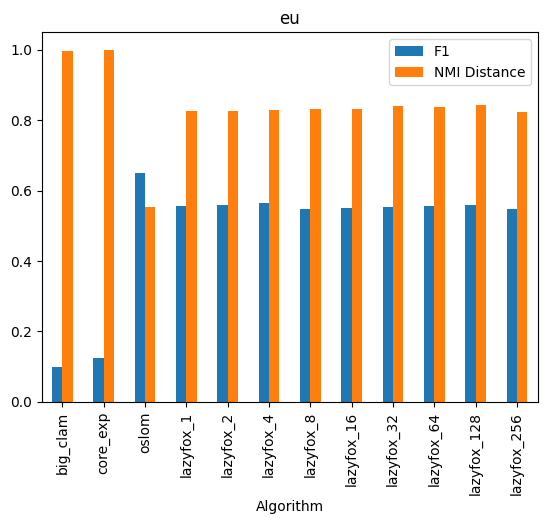

In [3]:
plot_scores("eu")

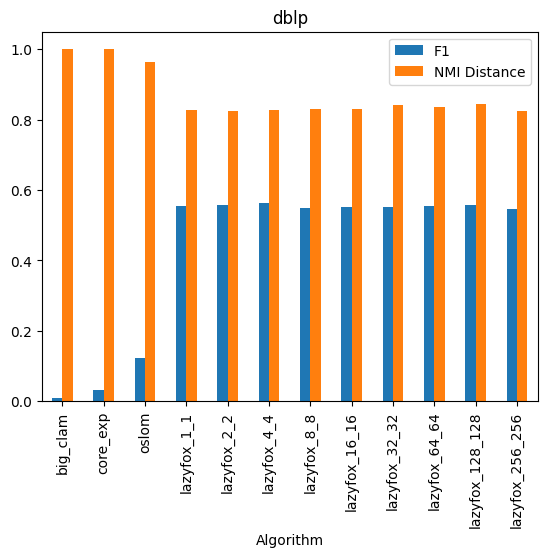

In [4]:
plot_scores("dblp")

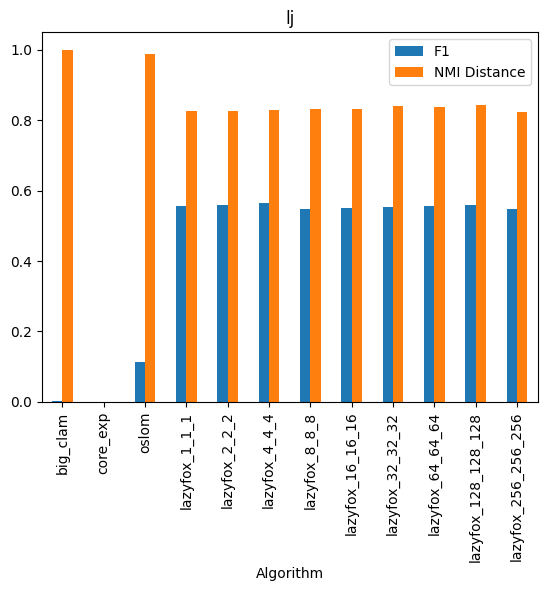

In [5]:
plot_scores("lj")

Idea:

As we can not find a good heuristic to keep the LazyFOX results close to the FOX results (`Additional Datasets`) I'd suggest to remove the comparision to FOX itself from our paper, and replace it purely with the analyses in this notebook.

This showcases that LazyFOX' results are stable over many degrees of parallelization and usually better than other community clustering approaches, while providing faster results, even without parallelization (FOX results).

This unfortunately wastes the work done on the additional datasets, which results I personally find quite interesting. We could argue, that the heuristic `m ** 0.2` provides a good heuristic to approximate the results of FOX, while still using parallelization. It seems unfit however to indicate a "good degree" of parallelization for stable results, as the result of `m**0.2` usually is much lower than the highest stable paralellization (especially on large datasets)